# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Storing the data in df

In [2]:
df= pd.read_excel('CarPrice_Assignment.xlsx')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2.0,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3.0,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4.0,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5.0,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [4]:
df= df.drop(['car_ID'], axis =1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    float64
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    float64
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    float64
 16  fuelsystem        205 non-null    object 
 1

# Categorical Features

In [6]:
categorical_cols=df.select_dtypes(include=['object']).columns
df[categorical_cols].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


# Numerical Features

In [7]:
numerical_cols=df.select_dtypes(include=['float64']).columns
df[numerical_cols].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


# Splitting Company Name from Car Name

In [8]:
split_names = df['CarName'].str.split(' ', expand=True)
company_names = split_names[0]
df['CarName'] = company_names

In [9]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota','vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [12]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Visualization of Categorical features

## Frequency of each car

[Text(0.5, 0, 'Car Name'), Text(0, 0.5, 'Frequency of car')]

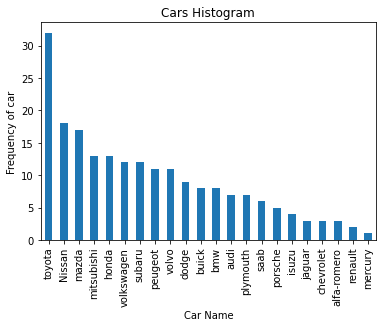

In [13]:
plt1 = df.CarName.value_counts().plot(kind='bar')
plt.title('Cars Histogram')
plt1.set(xlabel = 'Car Name', ylabel='Frequency of car')

We can see that Toyota is very in demand

### Top 10 Cars

In [ ]:
car_counts = df['CarName'].value_counts().head(10)
plt.barh(car_counts.index, car_counts.values)
plt.title('Top 10 Car Companies')
plt.xlabel('Frequency')
plt.ylabel('Car Name')
plt.show()

## Fuel Type

In [ ]:
count=pd.DataFrame(df['fueltype'].value_counts())
plot = count.plot.pie(y='fueltype', figsize=(5, 5))

In comparison of diesel with gas. Gas is more consumable

## Car Type

In [ ]:
plt1 = df.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

Cars of type Sedan is indemand

## Engine Type

In [ ]:
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

OHC type engine are more used in cars

## Door Numbers

In [ ]:
plt.title('Door Number Histogram')
sns.countplot(df.doornumber)

Four doors car are preferable by looking at the graph

## Car Body 

In [ ]:
plt.title('Car Body Histogram')
sns.countplot(df.carbody)

In [ ]:
plt.title('Drive Wheel Histogram')
sns.countplot(df.drivewheel)

In [ ]:
plt.title('Cylinder Number Histogram')
sns.countplot(df.cylindernumber)

In [ ]:
plt.title('Fuel System Histogram')
sns.countplot(df.fuelsystem)

In [ ]:
df1 = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

In [ ]:
df2 = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending=False))
df2.plot.bar()
plt.title('Car Name vs Average Price')
plt.show()

In [ ]:
df = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

In [ ]:
df = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

In [ ]:
df = pd.DataFrame(df.groupby(['doornumber'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

In [ ]:
df = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Body vs Average Price')
plt.show()

In [ ]:
df = pd.DataFrame(df.groupby(['drivewheel'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Drive wheel vs Average Price')
plt.show()

In [ ]:
df = pd.DataFrame(df.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Cylinder Number vs Average Price')
plt.show()

In [ ]:
df = pd.DataFrame(df.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel System vs Average Price')
plt.show()

In [ ]:
numerical_cols

In [ ]:
plt.scatter(df['carlength'],df['price'])
plt.title('carlength vs Price')
plt.ylabel('Price')
plt.xlabel('carlength')

In [ ]:
plt.scatter(df['carwidth'],df['price'])
plt.title('carwidth vs Price')
plt.ylabel('Price')
plt.xlabel('carwidth')

In [ ]:
plt.scatter(df['carheight'],df['price'])
plt.title('carheight vs Price')
plt.ylabel('Price')
plt.xlabel('carheight')

In [ ]:
plt.scatter(df['curbweight'],df['price'])
plt.title('curbweight vs Price')
plt.ylabel('Price')
plt.xlabel('curbweight')

In [ ]:
plt.scatter(df['enginesize'],df['price'])
plt.title('enginesize vs Price')
plt.ylabel('Price')
plt.xlabel('enginesize')

In [ ]:
plt.scatter(df['boreratio'],df['price'])
plt.title('boreratio vs Price')
plt.ylabel('Price')
plt.xlabel('boreratio')

In [ ]:
plt.scatter(df['stroke'],df['price'])
plt.title('stroke vs Price')
plt.ylabel('Price')
plt.xlabel('stroke')

In [ ]:
plt.scatter(df['compressionratio'],df['price'])
plt.title('compressionratio vs Price')
plt.ylabel('Price')
plt.xlabel('compressionratio')

In [ ]:
plt.scatter(df['horsepower'],df['price'])
plt.title('horsepower vs Price')
plt.ylabel('Price')
plt.xlabel('horsepower')

In [ ]:
plt.scatter(df['peakrpm'],df['price'])
plt.title('peakrpm vs Price')
plt.ylabel('Price')
plt.xlabel('peakrpm')

In [ ]:
plt.scatter(df['citympg'],df['price'])
plt.title('citympg vs Price')
plt.ylabel('Price')
plt.xlabel('citympg')

In [ ]:
plt.scatter(df['highwaympg'],df['price'])
plt.title('highwaympg vs Price')
plt.ylabel('Price')
plt.xlabel('highwaympg')

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical_cols].corr(), annot= True)

In [ ]:
df[numerical_cols].corr()

In [ ]:
new_df = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]

In [ ]:
new_df.head()

In [ ]:
new_df.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns = new_df.columns
for col in columns:
    if new_df[col].dtype == object:
        enc = LabelEncoder()
        new_df[col] = enc.fit_transform(df[col])

In [ ]:
new_df.dtypes

In [ ]:
new_df.head()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(), annot= True)

In [ ]:
X= new_df.drop(columns= ['price'])
Y= df['price']

In [ ]:
X

In [ ]:
Y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=9)

In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression().fit(x_train,y_train)

In [ ]:
print("Intercept:" , lr.intercept_)
print("Slope:",lr.coef_)

In [ ]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
lr.score(x_test,y_test)